In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\insurance_prediction\insurance_cost_prediction\data\insurance.csv')  

In [10]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [11]:
le = LabelEncoder()

for i in X.columns:
    if X[i].dtype == 'object':
        X[i] = le.fit_transform(X[i])

scaler = StandardScaler()

X = scaler.fit_transform(X)


# save encoder as pkl file

with open(r'C:\Users\pieta\OneDrive\Bureau\insurance_prediction\insurance_cost_prediction\model_training\encoder.pkl', 'wb') as file:
    pickle.dump(le, file)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Vérifiez si la cible est continue
print("Checking the target variable type...")
print(y_train[:10])  # Exemple de valeurs cibles

if np.issubdtype(y_train.dtype, np.number) and not np.array_equal(y_train, y_train.astype(int)):
    print("The target variable is continuous. Discretizing into classes...")
    
    # Discrétisation en classes (par exemple, 3 classes)
    y_train_discrete = pd.cut(y_train, bins=3, labels=[0, 1, 2])
    y_test_discrete = pd.cut(y_test, bins=3, labels=[0, 1, 2])
else:
    print("The target variable is already discrete.")
    y_train_discrete = y_train
    y_test_discrete = y_test

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Entraînement et évaluation
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    try:
        model.fit(X_train_scaled, y_train_discrete)  # Entraîner
        y_pred = model.predict(X_test_scaled)  # Prédire
        acc = accuracy_score(y_test_discrete, y_pred)  # Calculer l'accuracy
        results.append({'Model': model_name, 'Accuracy': acc})
        
        print(f"{model_name}: Accuracy = {acc:.4f}")
        print(classification_report(y_test_discrete, y_pred))
    except Exception as e:
        print(f"Error training {model_name}: {e}")

# Résultats sous forme de tableau
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)

Checking the target variable type...
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
170     13405.39030
277      2150.46900
1033    13747.87235
209      6610.10970
947     39047.28500
Name: charges, dtype: float64
The target variable is continuous. Discretizing into classes...

Training Logistic Regression...
Logistic Regression: Accuracy = 0.9254
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       216
           1       0.79      0.67      0.72        39
           2       0.86      0.92      0.89        13

    accuracy                           0.93       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.92      0.93      0.92       268


Training KNN...
KNN: Accuracy = 0.9179
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       216
           1       0.76      0.64      0.69        39
           2 

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Neural Network: Accuracy = 0.9328
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       216
           1       0.89      0.62      0.73        39
           2       0.80      0.92      0.86        13

    accuracy                           0.93       268
   macro avg       0.88      0.84      0.85       268
weighted avg       0.93      0.93      0.93       268


Summary of Results:
                 Model  Accuracy
0  Logistic Regression  0.925373
1                  KNN  0.917910
2                  SVM  0.936567
3        Random Forest  0.932836
4          Naive Bayes  0.809701
5       Neural Network  0.932836


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


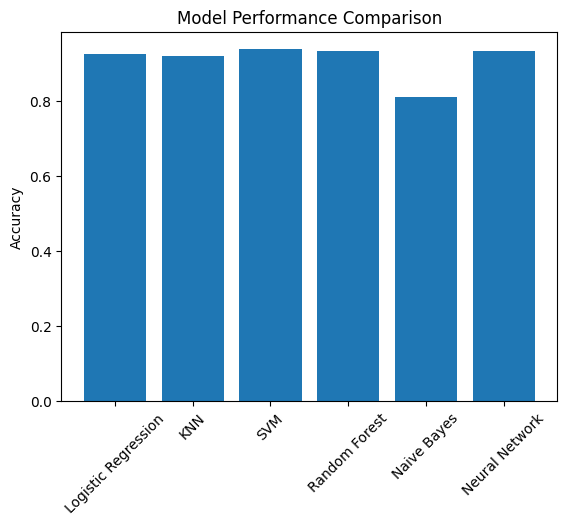

In [7]:
import matplotlib.pyplot as plt

# Plot results
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [8]:
# save best model to pickel file

# Choose the best model

best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Save the best model to a .pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model '{best_model_name}' saved to 'best_model.pkl'")

Best model 'SVM' saved to 'best_model.pkl'
